<a href="https://colab.research.google.com/github/saadkiet/RNN-ON-FASHION-MNIST/blob/master/RNN_ON_FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Set up and install

In [0]:
pip install tensorflow-gpu

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [0]:
print(tf.__version__)

2.1.0


# Step 2 : Importing Fashion_mnist Datasets

In [0]:
from tensorflow.keras.datasets import cifar10,fashion_mnist #RNN takes 2d array as input,not 3d..cifar 10 dataset has images in 3d format. Facing error

In [0]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [0]:
#ytrain,ytest=ytrain.flatten(),ytest.flatten()

In [0]:
ytrain.shape,ytest.shape

((60000,), (10000,))

In [0]:
xtrain.max(),xtrain.min()

(255, 0)

In [0]:
xtrain,xtest=xtrain/255,xtest/255

In [0]:
xtrain.max(),xtrain.min()

(1.0, 0.0)

# Step 3 : Building the RNN model

In [0]:
from tensorflow.keras.layers import Input,LSTM, Dense, Dropout
from tensorflow.keras.models import Model

In [0]:
i=Input(shape=xtrain[0].shape)
x=LSTM(15,activation='tanh')(i)
x=Dense(10,activation='softmax')(x)

model=Model(i,x)

In [0]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

In [0]:
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
r=model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 348us/sample - loss: 0.4514 - accuracy: 0.8389 - val_loss: 0.4662 - val_accuracy: 0.8354
Epoch 2/10
60000/60000 [==============================] - 19s 321us/sample - loss: 0.4419 - accuracy: 0.8435 - val_loss: 0.4522 - val_accuracy: 0.8399
Epoch 3/10
60000/60000 [==============================] - 19s 324us/sample - loss: 0.4278 - accuracy: 0.8475 - val_loss: 0.4423 - val_accuracy: 0.8433
Epoch 4/10
60000/60000 [==============================] - 20s 325us/sample - loss: 0.4165 - accuracy: 0.8520 - val_loss: 0.4320 - val_accuracy: 0.8484
Epoch 5/10
60000/60000 [==============================] - 19s 322us/sample - loss: 0.4080 - accuracy: 0.8549 - val_loss: 0.4253 - val_accuracy: 0.8476
Epoch 6/10
60000/60000 [==============================] - 20s 327us/sample - loss: 0.3998 - accuracy: 0.8571 - val_loss: 0.4217 - val_accuracy: 0.8503
Epoch 7/10
60000/60000 [====================

# Step 4 : Making Predictions

In [0]:
ypred=model.predict(xtest)

In [0]:
print(ypred)

[[9.6980114e-07 1.2142977e-05 6.6875386e-06 ... 7.5713429e-03
  2.0407165e-04 9.8318231e-01]
 [2.4802130e-04 1.2494919e-05 9.4512403e-01 ... 2.3265191e-07
  6.1853360e-05 2.2877200e-06]
 [1.8894347e-05 9.9978846e-01 1.6288908e-05 ... 4.6821679e-06
  4.9235501e-07 5.3950866e-06]
 ...
 [2.5402963e-02 3.7821876e-05 9.9468443e-06 ... 4.6376321e-05
  9.4334173e-01 9.1198726e-06]
 [2.8724111e-05 9.9887484e-01 6.5244819e-07 ... 2.7276935e-06
  4.9047521e-06 1.0413725e-05]
 [8.8051973e-05 9.2527318e-07 6.0292485e-04 ... 6.0312245e-03
  1.0346705e-03 5.8127088e-03]]


In [0]:
ypred=np.argmax(ypred,axis=1)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm=confusion_matrix(ypred,ytest)
print(cm)

[[734   2  14  23   0   0 127   0   1   0]
 [  4 955   0   8   1   1   3   0   0   0]
 [ 14   3 736  16  85   0 102   0  10   0]
 [ 53  30  13 880  34   0  31   0   2   0]
 [  6   5 149  30 810   0 108   0   5   0]
 [  1   0   0   0   0 945   0  15   3   6]
 [174   2  81  41  67   0 609   0   8   0]
 [  0   0   0   0   0  32   0 939   6  28]
 [ 14   3   7   2   3   3  20   0 965   2]
 [  0   0   0   0   0  19   0  46   0 964]]


# Step 5 : Model Evaluation

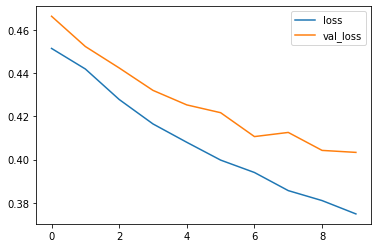

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

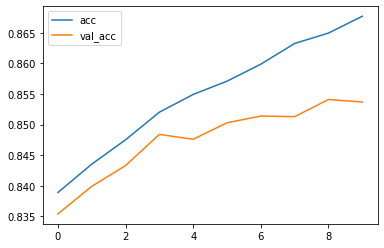

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
xtrain[0].shape

(28, 28)

# Step 6 : Building a new Improved RNN model

In [0]:
i1=Input(shape=xtrain[0].shape)

x1=LSTM(128,activation='relu')(i1)
#x1=Dropout(0.2)(x1)

#x1=LSTM(128,activation='relu')(x1) #By adding another layer of LSTM, test accuracy will increase even more.
#x1=Dropout(0.2)(x1)

x1=Dense(128,activation='relu')(x1)
x1=Dropout(0.2)(x1)
x1=Dense(10,activation='softmax')(x1)

model=Model(i,x)

model1=Model(i1,x1)

In [0]:
model1.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 128)               80384     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 98,186
Trainable params: 98,186
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt1=tf.keras.optimizers.Adam(learning_rate=0.001)

In [0]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
r1=model1.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.5152 - accuracy: 0.8091 - val_loss: 0.4247 - val_accuracy: 0.8443
Epoch 2/20
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.3781 - accuracy: 0.8608 - val_loss: 0.3628 - val_accuracy: 0.8676
Epoch 3/20
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.3404 - accuracy: 0.8759 - val_loss: 0.3377 - val_accuracy: 0.8717
Epoch 4/20
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.3157 - accuracy: 0.8831 - val_loss: 0.3348 - val_accuracy: 0.8772
Epoch 5/20
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.2990 - accuracy: 0.8894 - val_loss: 0.3196 - val_accuracy: 0.8821
Epoch 6/20
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.2884 - accuracy: 0.8933 - val_loss: 0.3122 - val_accuracy: 0.8839
Epoch 7/20
60000/60000 [==============================] 

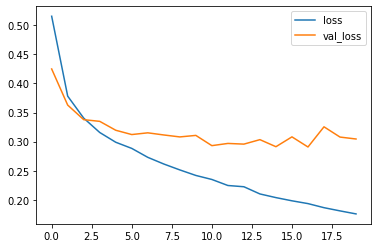

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r1.history['loss'], label='loss')
plt.plot(r1.history['val_loss'], label='val_loss')
plt.legend()

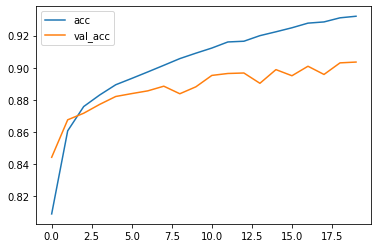

In [0]:
# Plot accuracy per iteration
plt.plot(r1.history['accuracy'], label='acc')
plt.plot(r1.history['val_accuracy'], label='val_acc')
plt.legend()